Car price prediction by linear regression:-

Problem Statement A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1) Which variables are significant in predicting the price of a car

2) How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
C_data=pd.read_csv("/content/CarPrice_Assignment.csv")

In [3]:
C_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
C_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#dropping column
C_data.drop(["CarName"],axis=1,inplace=True)

In [6]:
#converting categorical into numerical
C_data["fueltype"]=C_data["fueltype"].apply({'gas':0,'diesel':1}.get)
C_data["aspiration"]=C_data["aspiration"].apply({'std':0,'turbo':1}.get)
C_data["doornumber"]=C_data["doornumber"].apply({'two':0,'four':1}.get)
C_data["carbody"]=C_data["carbody"].apply({'sedan':0,'hatchback':1,'wagon':2,'convertible':3,'hardtop':4}.get)
C_data["drivewheel"]=C_data["drivewheel"].apply({'fwd':0,'rwd':1,'4wd':2}.get)
C_data["enginelocation"]=C_data["enginelocation"].apply({'front':0,'rear':1}.get)
C_data["enginetype"]=C_data["enginetype"].apply({'ohc':0,'ohcf':1,'ohcv':2,'l':3,'rotor':4,'dohcv':5,'dohc':6}.get)
C_data["cylindernumber"]=C_data["cylindernumber"].apply({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}.get)
C_data["fuelsystem"]=C_data["fuelsystem"].apply({'mpfi':0,'2bbl':1,'mfi':2,'1bbl':3,'spdi':4,'4bbl':5,'idi':6,'spfi':7}.get)

In [7]:
C_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,0,3,1,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,0,0,3,1,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,0,0,1,1,0,94.5,171.2,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,0,0,1,0,0,0,99.8,176.6,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,0,0,1,0,2,0,99.4,176.6,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
C_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

In [9]:
#divide the variable into dependant(y) and independant(x).
x=C_data[["symboling","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","wheelbase","carlength","carwidth","carheight","curbweight","enginetype","cylindernumber","enginesize","fuelsystem","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg"]]
y=C_data["price"]

In [14]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
x_test.shape

(41, 23)

In [19]:
#applying ML algoritham
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [20]:
regression.fit(x_train,y_train)

LinearRegression()

In [21]:
prediction=regression.predict(x_test)

In [22]:
prediction

array([ 8330.32800454, 17915.85458424, 11814.13897527,  8950.76065293,
       24379.32959287, 10370.32760127, 14525.03728776,  7470.10948202,
       12285.83495122, 37849.06045911,  8925.83079638,  6307.31841018,
       13283.65522055,  5481.43178467,  5169.51944433,  7445.82384629,
       21259.09986059,  6863.49397184,  5629.14887246,  8987.49209946,
       11762.72796349,  8649.4288305 , 21136.16648845, 27129.28378031,
       42628.64200467,  5951.50569389,  6661.45559248, 23913.30090683,
       11491.47270629, 22029.5299343 ,  9670.08651662, 10703.50134323,
        6517.45826062,  4835.40845621,  7445.82384629, 18440.96931919,
       10726.27611728,  7783.22802243,  8399.77100965, 33565.75526892,
        5795.10030691])

In [25]:
regression.score(x,y)

0.8689441988431703

In [26]:
#calculate mean squared error
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("MSE : ",mean_squared_error(y_test,prediction))
print("R2_Score :",r2_score(y_test,prediction))

MSE :  19937109.77942173
R2_Score : 0.8299112548317249


In [27]:
#adding New_data to finding car value
NC_data={"symboling": 3 ,"fueltype" :1,"aspiration":1,"doornumber":0,"carbody":0,"drivewheel":2,"enginelocation":0,"wheelbase":105.8,"carlength":192.7,"carwidth":71.4,"carheight":55.7,"curbweight":2844,"enginetype":5,"cylindernumber":6 ,"enginesize":136,"fuelsystem":0,"boreratio":3.198,"stroke":3.4,"compressionratio":8.5,"horsepower":160,"peakrpm":5500,"citympg":19,"highwaympg":25}
index=[1]

In [28]:
New_car_data=pd.DataFrame(NC_data,index)

In [29]:
New_car_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
1,3,1,1,0,0,2,0,105.8,192.7,71.4,...,6,136,0,3.198,3.4,8.5,160,5500,19,25


In [30]:
New_prediction_value=regression.predict(New_car_data)

In [31]:
print(" New car Value are ", New_prediction_value)

 New car Value are  [9521.26418492]


In [32]:
#EDA
#again adding the data
Car_Data=pd.read_csv("/content/CarPrice_Assignment.csv")

In [33]:
Car_Data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


/tmp/ipython-input-3578363583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.values, y=top_30.index,  palette='colorblind')


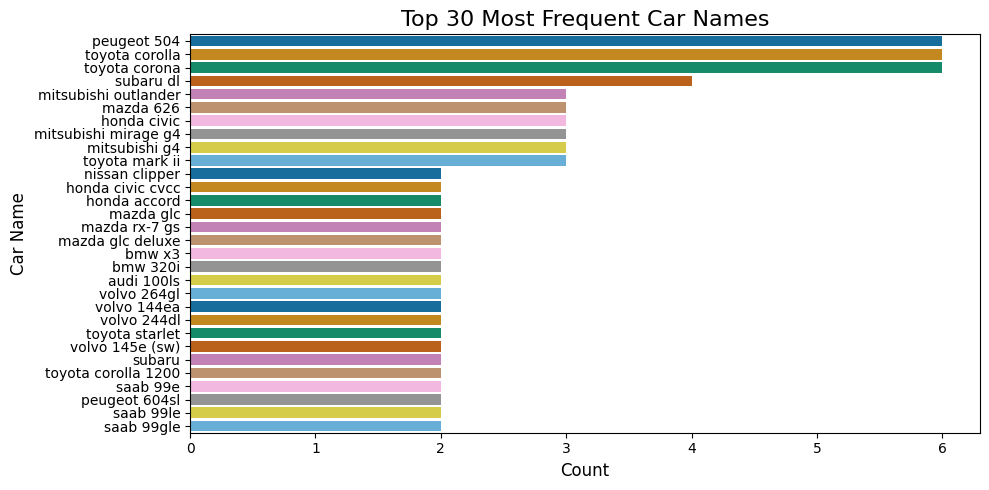

In [38]:
top_30 = Car_Data['CarName'].value_counts().nlargest(30) #.value_counts use for count the car names.

plt.figure(figsize=(10, 5))
sns.barplot(x=top_30.values, y=top_30.index,  palette='colorblind')
plt.title('Top 30 Most Frequent Car Names', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Car Name', fontsize=12)
plt.tight_layout()
plt.show()

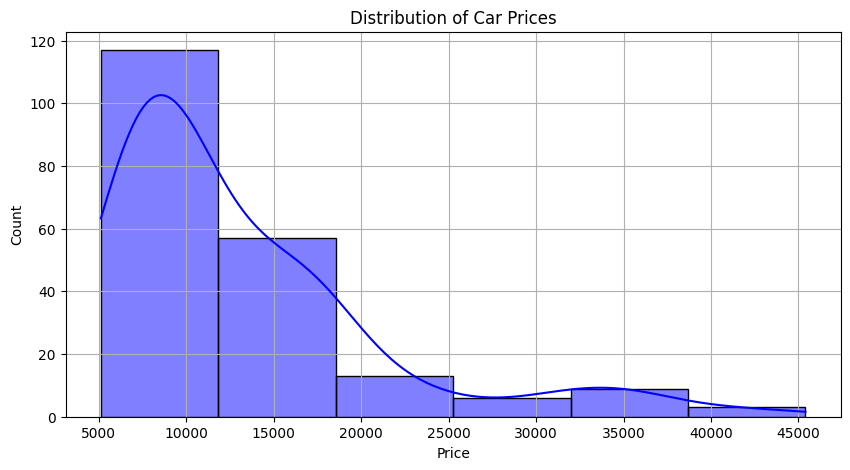

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(Car_Data['price'], kde=True, color='Blue', bins=6) #kde=it is stands for kernel density estimate,use for line distribution on graph
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(True)
plt.show()

/tmp/ipython-input-2022540829.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_car_models.values,y=top_car_models.index,palette='colorblind')


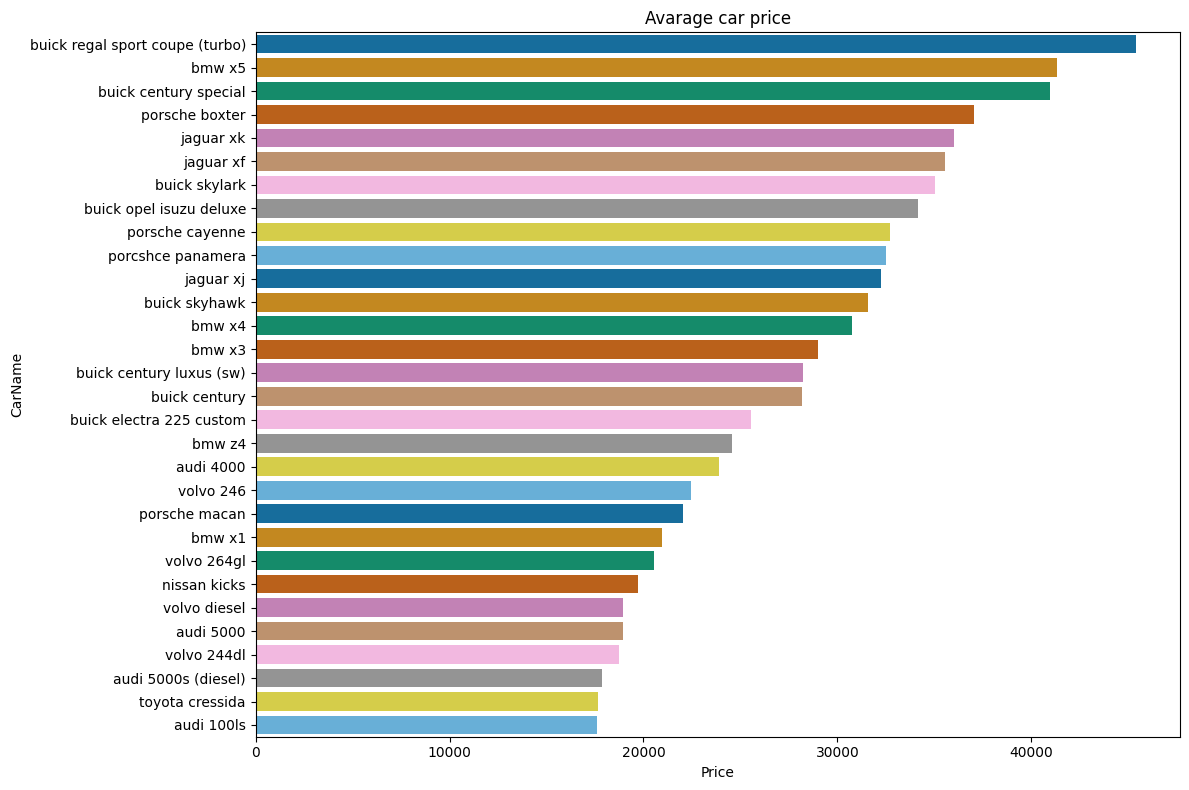

In [40]:
#we want avg prices of the cars
avg=Car_Data.groupby('CarName')['price'].mean().sort_values(ascending=False)

top_car_models=avg.head(30)

plt.figure(figsize=(12,8))
sns.barplot(x=top_car_models.values,y=top_car_models.index,palette='colorblind')
plt.title("Avarage car price")
plt.xlabel("Price")
plt.ylabel("CarName")
plt.tight_layout()
plt.show()

<Axes: xlabel='stroke', ylabel='price'>

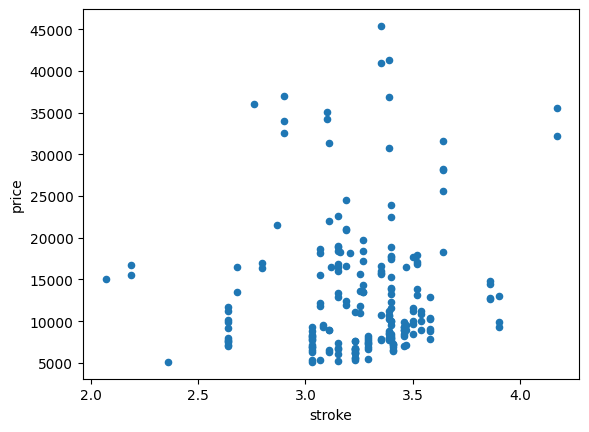

In [41]:
Car_Data.plot.scatter(x="stroke",y="price")